<a href="https://colab.research.google.com/github/Hanzmapua/Pytorch-Tutorial/blob/main/IntrotoColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [91]:
class Model(nn.Module):
    #input layer (4 features of flowers)
    #hl1(# of neurons)
    #hl2(# of neurons)
    #output(which of 3 classes)
    def __init__(self, in_features=4, h1=10, h2=10, out_features=3):
      super().__init__()
      self.w1 = nn.Linear(in_features, h1)
      self.w2 = nn.Linear(h1, h2)
      self.out = nn.Linear(h2, out_features)

    def forward(self, x):
      x = F.relu(self.w1(x))
      x = F.relu(self.w2(x))
      x = self.out(x)

      return x

In [92]:
torch.manual_seed(41)
model = Model()

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [95]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [96]:
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

<ipython-input-96-31d2ab34cca2>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [97]:
X = my_df.drop('species', axis=1)
y = my_df['species']

In [98]:
X = X.values
y = y.values

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [101]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [102]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [103]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [104]:
epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(X_train)

  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'Epoch: {i} and loss {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss 1.1540955305099487
Epoch: 10 and loss 0.9390320181846619
Epoch: 20 and loss 0.660959005355835
Epoch: 30 and loss 0.3760317265987396
Epoch: 40 and loss 0.21914519369602203
Epoch: 50 and loss 0.12619683146476746
Epoch: 60 and loss 0.07760121673345566
Epoch: 70 and loss 0.05469841882586479
Epoch: 80 and loss 0.0433650016784668
Epoch: 90 and loss 0.03697401285171509


Text(0.5, 0, 'Epochs')

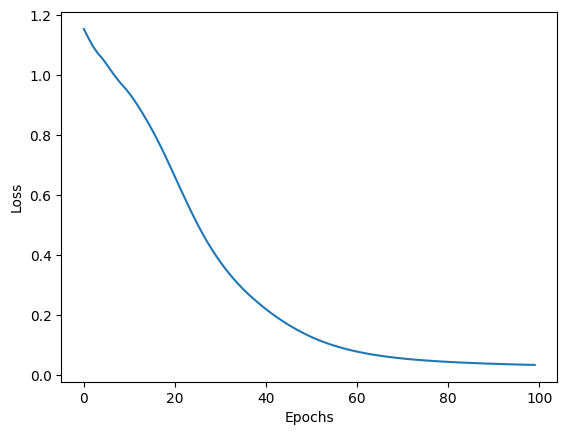

In [105]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')